In [ ]:
import random
import numpy as np

# Define the objective function to be optimized
def objective_function(x):
    # Example objective function: Sphere function
    return sum(x**2)

def whale_optimization_algorithm(obj_func, num_dimensions, num_iter, num_whales):
    # Initialize the positions of the whales
    whales = np.random.uniform(low=-1, high=1, size=(num_whales, num_dimensions))
    
    # Initialize the best positions and fitness values
    best_position = np.zeros(num_dimensions)
    print(best_position)
    best_fitness = float('inf')
    
    for t in range(num_iter):
        a = 2 - 2 * t / num_iter  # parameter to control the spiral updating
        
        for i in range(num_whales):
            # Update the position of the current whale
            r1 = random.random()  # random weight
            r2 = random.random()  # random weight
            
            A = 2 * a * r1 - a
            C = 2 * r2
            
            # Update the position of the current whale based on the three equations
            D = abs(C * best_position - whales[i])
            new_position = best_position - A * D

            
            # Clip the position to the search space boundaries if necessary
            new_position = np.clip(new_position, -1, 1)
            
            # Calculate the fitness of the new position
            new_fitness = obj_func(new_position)
            
            # Update the best position and fitness if necessary
            if new_fitness < best_fitness:
                best_fitness = new_fitness
                best_position = new_position
        
        # Update the a value for the next iteration
        a = 2 * a * random.random() - a
    
    return best_position, best_fitness

# Example usage
num_dimensions = 1
num_iter = 1000
num_whales = 100

best_position, best_fitness = whale_optimization_algorithm(objective_function, num_dimensions, num_iter, num_whales)

print("Best position:", best_position)
print("Best fitness:", best_fitness)

[0.]
Best position: [3.08334956e-08]
Best fitness: 9.507044490121963e-16


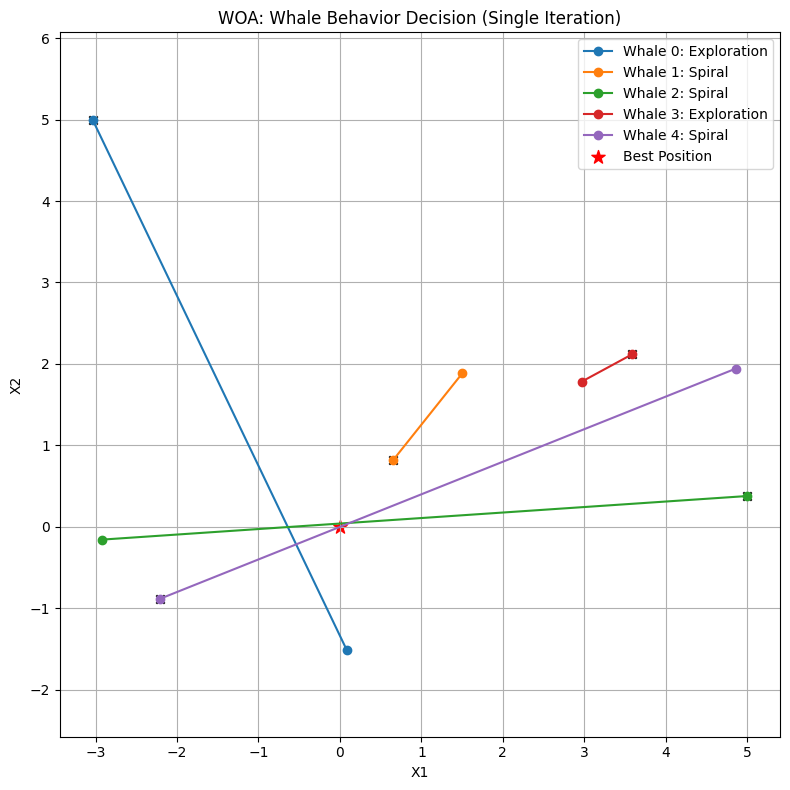

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# --- Configuration ---
num_whales = 5
dimensions = 2          # 2D space
lb, ub = -5, 5          # Search space bounds
a = 1.5                 # Convergence parameter (midpoint)
best_position = np.array([0.0, 0.0])

# --- Initialize whale positions ---
positions = np.random.uniform(lb, ub, (num_whales, dimensions))
new_positions = []
decision_log = []

# --- One iteration of WOA decision process ---
for i in range(num_whales):
    r1 = np.random.rand(dimensions)
    r2 = np.random.rand(dimensions)
    A = 2 * a * r1 - a
    C = 2 * r2
    p = np.random.rand()

    if p < 0.5:
        if np.linalg.norm(A) < 1:
            # Shrinking encircling behavior
            behavior = 'Encircling'
            D = np.abs(C * best_position - positions[i])
            new_pos = best_position - A * D
        else:
            # Exploration using a random whale
            behavior = 'Exploration'
            rand_index = np.random.randint(num_whales)
            X_rand = positions[rand_index]
            D = np.abs(C * X_rand - positions[i])
            new_pos = X_rand - A * D
    else:
        # Spiral updating behavior
        behavior = 'Spiral'
        D_prime = np.abs(best_position - positions[i])
        b = 1
        l = np.random.uniform(-1, 1)
        new_pos = D_prime * np.exp(b * l) * np.cos(2 * np.pi * l) + best_position

    # Clamp position to bounds
    new_pos = np.clip(new_pos, lb, ub)
    new_positions.append(new_pos)
    decision_log.append((positions[i], new_pos, behavior))

# --- Visualization ---
plt.figure(figsize=(8, 8))
for i, (start, end, behavior) in enumerate(decision_log):
    plt.plot([start[0], end[0]], [start[1], end[1]], marker='o', label=f'Whale {i}: {behavior}')
    plt.scatter(end[0], end[1], marker='x', c='black')  # New position

# Mark the best position (target)
plt.scatter(best_position[0], best_position[1], color='red', s=100, label='Best Position', marker='*')
plt.title("WOA: Whale Behavior Decision (Single Iteration)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()


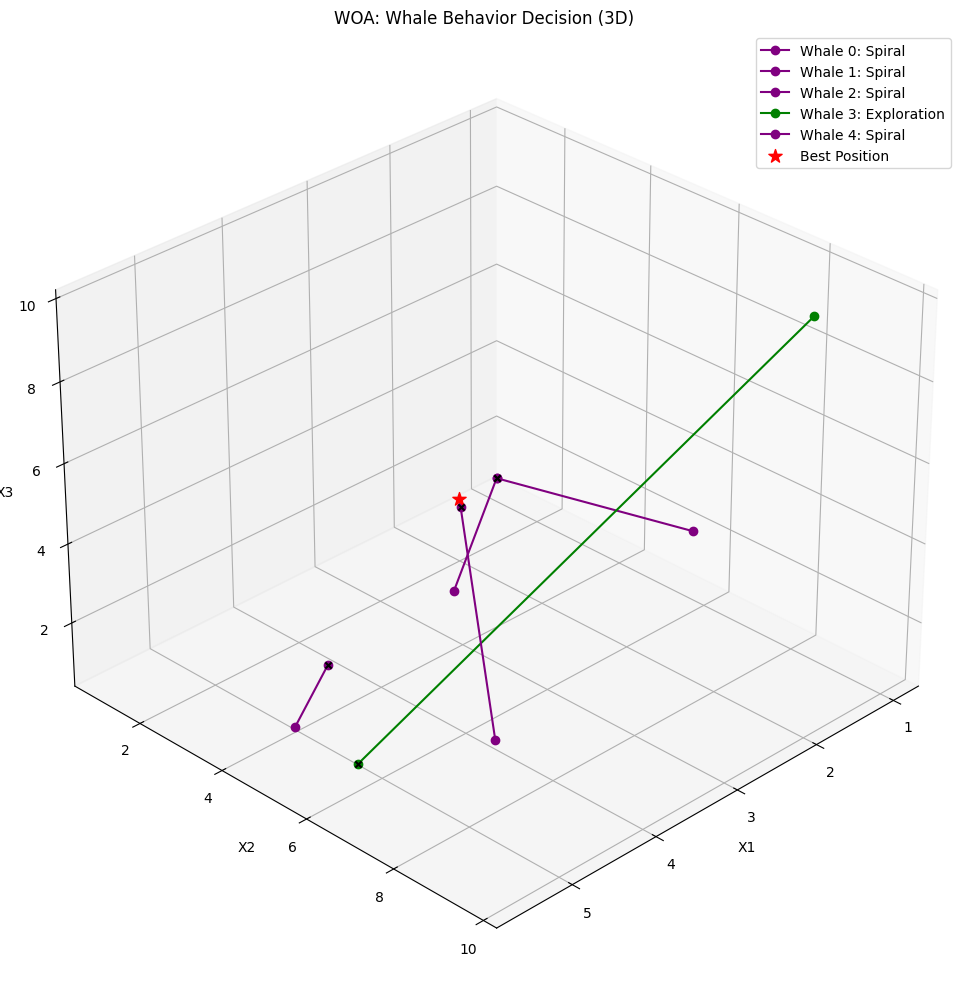

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- Configuration ---
num_whales = 5
dim = 3  # 3D space
lb, ub = 1, 10
a = 1.5  # convergence parameter
best_position = np.array([2.0, 2.0, 2.0])  # assume optimal at origin

# --- Initialize whale positions ---
positions = np.random.uniform(lb, ub, (num_whales, dim))
new_positions = []
decision_log = []

# --- One iteration of WOA decision process ---
for i in range(num_whales):
    r1 = np.random.rand(dim)
    r2 = np.random.rand(dim)
    A = 2 * a * r1 - a
    C = 2 * r2
    p = np.random.rand()

    if p < 0.5:
        if np.linalg.norm(A) < 1:
            behavior = 'Encircling'
            D = np.abs(C * best_position - positions[i])
            new_pos = best_position - A * D
        else:
            behavior = 'Exploration'
            rand_index = np.random.randint(num_whales)
            X_rand = positions[rand_index]
            D = np.abs(C * X_rand - positions[i])
            new_pos = X_rand - A * D
    else:
        behavior = 'Spiral'
        D_prime = np.abs(best_position - positions[i])
        b = 1
        l = np.random.uniform(-1, 1)
        new_pos = D_prime * np.exp(b * l) * np.cos(2 * np.pi * l) + best_position

    new_pos = np.clip(new_pos, lb, ub)
    new_positions.append(new_pos)
    decision_log.append((positions[i], new_pos, behavior))

# --- 3D Visualization ---
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

colors = {'Encircling': 'blue', 'Exploration': 'green', 'Spiral': 'purple'}
for i, (start, end, behavior) in enumerate(decision_log):
    ax.plot([start[0], end[0]], [start[1], end[1]], [start[2], end[2]],
            marker='o', color=colors[behavior], label=f'Whale {i}: {behavior}')
    ax.scatter(end[0], end[1], end[2], marker='x', color='black')

ax.scatter(*best_position, color='red', s=100, label='Best Position', marker='*')
ax.view_init(elev=30, azim=45)
ax.set_title("WOA: Whale Behavior Decision (3D)")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X3")
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()


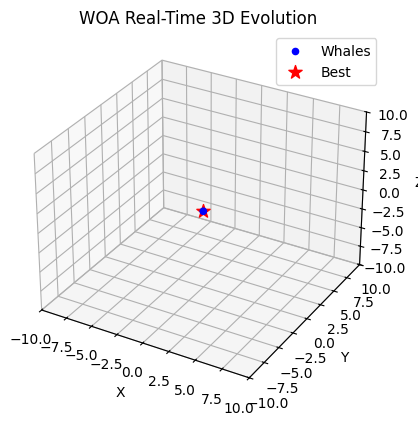

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Objective function
def objective_function(position):
    return np.sum(position ** 2)

# WOA parameters
num_agents = 2
dim = 3
lb, ub = -10, 10
max_iter = 50

# Initialize agents
positions = np.random.uniform(lb, ub, (num_agents, dim))
best_position = positions[0].copy()
best_score = objective_function(best_position)

# Matplotlib setup
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(lb, ub)
ax.set_ylim(lb, ub)
ax.set_zlim(lb, ub)
ax.set_title("WOA Real-Time 3D Evolution")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

scat_agents = ax.scatter([], [], [], c='blue', label='Whales')
scat_best = ax.scatter([], [], [], c='red', s=100, marker='*', label='Best')
plt.legend()

def init():
    scat_agents._offsets3d = ([], [], [])
    scat_best._offsets3d = ([], [], [])
    return scat_agents, scat_best

def update(frame):
    global positions, best_position, best_score

    a = 2 - frame * (2 / max_iter)
    new_positions = []

    for i in range(num_agents):
        fitness = objective_function(positions[i])
        if fitness < best_score:
            best_score = fitness
            best_position = positions[i].copy()

    for i in range(num_agents):
        r1, r2 = np.random.rand(dim), np.random.rand(dim)
        A = 2 * a * r1 - a
        C = 2 * r2
        p = np.random.rand()
        if p < 0.5:
            if np.linalg.norm(A) < 1:
                D = np.abs(C * best_position - positions[i])
                new_pos = best_position - A * D
            else:
                rand_idx = np.random.randint(num_agents)
                rand_pos = positions[rand_idx]
                D = np.abs(C * rand_pos - positions[i])
                new_pos = rand_pos - A * D
        else:
            D_prime = np.abs(best_position - positions[i])
            b = 1
            l = np.random.uniform(-1, 1)
            new_pos = D_prime * np.exp(b * l) * np.cos(2 * np.pi * l) + best_position

        new_pos = np.clip(new_pos, lb, ub)
        new_positions.append(new_pos)

    positions[:] = new_positions

    xs, ys, zs = positions[:, 0], positions[:, 1], positions[:, 2]
    scat_agents._offsets3d = (xs, ys, zs)
    scat_best._offsets3d = ([best_position[0]], [best_position[1]], [best_position[2]])

    return scat_agents, scat_best

# Create animation
ani = FuncAnimation(fig, update, init_func=init, frames=max_iter, interval=300, blit=False)
ani.save('woa_real_time_evolution.mp4', writer='ffmpeg', fps=10)
plt.show()
